In [ ]:
import pandas as pd
import numpy as np

# Load the CSV file
file_path = "/content/weathered_full.csv"
df = pd.read_csv(file_path)
plastics = ['PVC', 'PET', 'PP', 'PE', 'PA']
df = df[df['plastic'].isin(plastics)]

In [ ]:
df

,plastic,filename,200.4755491,203.3592491,206.2419365,209.1236123,212.0042772,214.8839322,217.7625781,220.6402157,...,3480.652831,3482.555849,3484.458372,3486.3604,3488.261932,3490.16297,3492.063513,3493.963561,3495.863115,3497.762175
0,PET,wea-100.txt,996.25,998.25,996.50,1007.25,1000.25,1020.25,1007.50,1006.50,...,2947.50,2931.50,2901.75,2905.00,2929.75,2866.00,2870.50,2886.50,2938.50,2913.25
1,PE,wea-101.txt,694.75,699.75,701.25,692.25,698.00,699.50,700.00,701.00,...,1843.00,1832.50,1843.00,1843.00,1857.50,1839.00,1833.50,1861.75,1881.75,1826.00
2,PET,wea-102.txt,947.50,945.75,937.00,947.25,940.75,942.25,963.00,954.25,...,3904.25,3899.00,3930.75,3883.00,3926.75,3848.75,3867.75,3898.50,3926.25,3869.75
3,PE,wea-103.txt,641.50,639.25,637.75,641.75,637.25,638.00,639.50,639.50,...,1011.00,996.25,1000.50,997.75,999.50,1001.75,1018.00,999.25,1004.25,1012.25
4,PE,wea-104.txt,624.25,628.50,625.50,632.75,626.50,629.00,623.25,620.25,...,3206.25,3151.75,3217.75,3200.25,3178.00,3169.00,3188.25,3218.75,3228.50,3161.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,PE,wea-95.txt,1154.00,1146.25,1153.00,1178.75,1167.50,1152.00,1157.25,1173.00,...,4730.25,4744.00,4753.00,4705.50,4715.25,4699.25,4702.00,4759.25,4756.50,4734.00
151,PE,wea-96.txt,1245.75,1254.75,1231.50,1258.00,1255.25,1255.00,1238.25,1251.50,...,2952.50,2987.00,2955.75,2945.00,2960.25,2907.50,2952.75,2940.75,2971.25,2915.25
152,PE,wea-97.txt,802.00,806.25,813.25,799.75,806.75,801.50,804.00,809.50,...,2775.00,2763.50,2748.25,2758.50,2754.50,2734.00,2748.00,2786.00,2780.75,2742.25
153,PE,wea-98.txt,1018.75,1018.25,1029.00,1030.00,1032.75,1030.25,1036.75,1027.75,...,5206.75,5258.25,5220.50,5200.75,5201.00,5167.00,5224.75,5267.00,5200.25,5203.25


In [ ]:
df['plastic'].value_counts()

,count
plastic,
PE,72
PP,51
PET,10
PVC,7
PA,4


In [ ]:
import pandas as pd
import numpy as np

# Load the CSV file
file_path = "/content/weathered_full.csv"
df = pd.read_csv(file_path)
plastics = ['PVC', 'PET', 'PP', 'PE', 'PA']
df = df[df['plastic'].isin(plastics)]

# Columns to exclude from augmentation (categorical columns)
exclude_cols = ["plastic", "filename"]

# Identify numeric columns excluding the categorical ones
numeric_cols = df.select_dtypes(include=[np.number]).columns.difference(exclude_cols)

# Define number of augmentations per "plastic" type
plastic_augmentation_map = {
    "PE": 0,
    "PP": 0,
    "PET": 6,
    "PVC": 9,
    "PA": 17
}

# Function to generate augmented rows while keeping values close to the original row
def augment_row(row, num_augmentations, noise_factor=0.005):
    augmented_rows = []

    for _ in range(num_augmentations):
        new_row = row.copy()

        # Generate small noise with respect to the original row
        noise = np.random.normal(loc=0, scale=noise_factor * np.abs(row[numeric_cols]), size=row[numeric_cols].shape)
        new_row[numeric_cols] = row[numeric_cols] + noise

        # Ensure variations remain within a tight range of the original row
        new_row[numeric_cols] = np.clip(new_row[numeric_cols], row[numeric_cols] * 0.995, row[numeric_cols] * 1.005)

        # Ensure categorical columns are copied exactly
        new_row[exclude_cols] = row[exclude_cols]

        augmented_rows.append(new_row)

    return augmented_rows

# Apply augmentation
augmented_data = []
for i in range(len(df)):
    original_row = df.iloc[i]
    augmented_data.append(original_row)

    plastic_type = original_row["plastic"]
    num_augmentations = plastic_augmentation_map.get(plastic_type, 0)

    augmented_data.extend(augment_row(original_row, num_augmentations))

# Create new DataFrame
augmented_df = pd.DataFrame(augmented_data, columns=df.columns)

# Save the augmented dataset
augmented_file_path = "/content/augmented_weathered_full_5plastics.csv"
augmented_df.to_csv(augmented_file_path, index=False)

print(f"Augmented dataset saved to: {augmented_file_path}")


/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return bound(*args, **kwds)
/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return bound(*args, **kwds)
/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavi

Augmented dataset saved to: /content/augmented_weathered_full.csv


In [ ]:

# # Columns to exclude from augmentation (categorical columns)
# exclude_cols = ["plastic", "filename"]

# # Identify numeric columns excluding the categorical ones
# numeric_cols = df.select_dtypes(include=[np.number]).columns.difference(exclude_cols)

# # Use header row (row 0) as the reference for relationships
# reference_row = df.iloc[0]

# # Define number of augmentations per "plastic" type
# plastic_augmentation_map = {
#     "PE": 0,
#     "PP": 0,
#     "PET": 6,
#     "PVC": 9,
#     "PA": 17
# }

# # Function to generate augmented rows while maintaining reference relationships
# def augment_row(row, reference_row, num_augmentations, noise_factor=0.01):
#     augmented_rows = []

#     for _ in range(num_augmentations):
#         new_row = row.copy()

#         # Generate small noise with respect to reference row
#         noise = np.random.normal(loc=0, scale=noise_factor * np.abs(reference_row[numeric_cols]), size=row[numeric_cols].shape)
#         new_row[numeric_cols] = reference_row[numeric_cols] + noise

#         # Ensure variations remain within a tight range
#         new_row[numeric_cols] = np.clip(new_row[numeric_cols], reference_row[numeric_cols] * 0.99, reference_row[numeric_cols] * 1.01)

#         # Ensure categorical columns are copied exactly
#         new_row[exclude_cols] = row[exclude_cols]

#         augmented_rows.append(new_row)

#     return augmented_rows

# # Apply augmentation
# augmented_data = []
# for i in range(len(df)):
#     original_row = df.iloc[i]
#     augmented_data.append(original_row)

#     plastic_type = original_row["plastic"]
#     num_augmentations = plastic_augmentation_map.get(plastic_type, 0)

#     augmented_data.extend(augment_row(original_row, reference_row, num_augmentations))

# # Create new DataFrame
# augmented_df = pd.DataFrame(augmented_data, columns=df.columns)

# # Save the augmented dataset
# augmented_file_path = "/content/augmented_weathered_full.csv"
# augmented_df.to_csv(augmented_file_path, index=False)

# print(f"Augmented dataset saved to: {augmented_file_path}")


/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return bound(*args, **kwds)
/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return bound(*args, **kwds)
/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavi

Augmented dataset saved to: /content/augmented_weathered_full.csv


In [ ]:

# # Columns to exclude from augmentation (categorical columns)
# exclude_cols = ["plastic", "filename"]

# # Identify numeric columns excluding the categorical ones
# numeric_cols = df.select_dtypes(include=[np.number]).columns.difference(exclude_cols)

# # Use header row (row 0) as the reference for relationships
# reference_row = df.iloc[0]

# # Define number of augmentations per "plastic" type
# plastic_augmentation_map = {
#     "PE": 0,
#     "PP": 0,
#     "PET": 6,
#     "PVC": 9,
#     "PA": 17
# }

# # Function to generate augmented rows with Gaussian noise while maintaining header relationships
# def augment_row(row, reference_row, num_augmentations, noise_factor=0.03):
#     augmented_rows = []

#     for _ in range(num_augmentations):
#         new_row = row.copy()

#         # Apply Gaussian noise only to selected numeric columns
#         noise = np.random.normal(loc=0, scale=noise_factor * np.abs(row[numeric_cols]), size=row[numeric_cols].shape)
#         new_row[numeric_cols] = row[numeric_cols] + noise

#         # Clip values to avoid extreme deviations
#         new_row[numeric_cols] = np.clip(new_row[numeric_cols], row[numeric_cols] * (1 - noise_factor), row[numeric_cols] * (1 + noise_factor))

#         # Maintain relationships with the reference row (header row, excluding categorical)
#         scaling_factors = reference_row[numeric_cols] / row[numeric_cols]
#         new_row[numeric_cols] *= scaling_factors  # Adjust variations proportionally

#         # Ensure categorical columns are copied exactly
#         new_row[exclude_cols] = row[exclude_cols]

#         augmented_rows.append(new_row)

#     return augmented_rows

# # Apply augmentation from first data row (index 0) onwards
# augmented_data = []
# for i in range(len(df)):  # Start from row index 0 (excluding the header row)
#     original_row = df.iloc[i]
#     augmented_data.append(original_row)

#     # Get the number of augmentations based on the "plastic" column
#     plastic_type = original_row["plastic"]
#     num_augmentations = plastic_augmentation_map.get(plastic_type, 0)  # Default to 0 if not found

#     # Augment based on the plastic type
#     augmented_data.extend(augment_row(original_row, reference_row, num_augmentations))

# # Create new DataFrame
# augmented_df = pd.DataFrame(augmented_data, columns=df.columns)

# # Save the augmented dataset
# augmented_file_path = "/content/augmented_weathered_full.csv"
# augmented_df.to_csv(augmented_file_path, index=False)

# print(f"Augmented dataset saved to: {augmented_file_path}")


/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return bound(*args, **kwds)
/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return bound(*args, **kwds)
/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavi

Augmented dataset saved to: /content/augmented_weathered_full.csv


In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('/content/augmented_weathered_full_5plastics.csv')  # Replace 'file.csv' with your actual file path

# Display the first few rows
print(df.head())


  plastic     filename  200.4755491  203.3592491  206.2419365  209.1236123  \
0     PET  wea-100.txt   996.250000   998.250000   996.500000  1007.250000   
1     PET  wea-100.txt   991.268750  1003.241250   996.038020  1012.286250   
2     PET  wea-100.txt  1001.145969  1000.603533   993.003053  1006.095053   
3     PET  wea-100.txt  1001.231250  1003.241250  1000.516965  1002.213750   
4     PET  wea-100.txt  1001.231250  1003.241250   991.994421  1007.598963   

   212.0042772  214.8839322  217.7625781  220.6402157  ...  3480.652831  \
0  1000.250000  1020.250000  1007.500000  1006.500000  ...  2947.500000   
1   995.332820  1015.148750  1002.462500  1001.467500  ...  2941.370080   
2   997.894412  1015.222841  1003.243997  1004.429233  ...  2932.762500   
3   997.122288  1016.019612  1004.713470  1001.467500  ...  2936.232335   
4   995.248750  1025.351250  1008.100181  1003.652660  ...  2932.762500   

   3482.555849  3484.458372    3486.3604  3488.261932   3490.16297  \
0  2931.50

In [ ]:
df


,plastic,filename,200.4755491,203.3592491,206.2419365,209.1236123,212.0042772,214.8839322,217.7625781,220.6402157,...,3480.652831,3482.555849,3484.458372,3486.3604,3488.261932,3490.16297,3492.063513,3493.963561,3495.863115,3497.762175
0,PET,wea-100.txt,996.250000,998.250000,996.500000,1007.250000,1000.250000,1020.250000,1007.500000,1006.500000,...,2947.500000,2931.500000,2901.750000,2905.000000,2929.750000,2866.000000,2870.500000,2886.500000,2938.500000,2913.250000
1,PET,wea-100.txt,991.268750,1003.241250,996.038020,1012.286250,995.332820,1015.148750,1002.462500,1001.467500,...,2941.370080,2925.248432,2896.503802,2915.268046,2920.670602,2856.149079,2863.496574,2891.072993,2946.186547,2927.816250
2,PET,wea-100.txt,1001.145969,1000.603533,993.003053,1006.095053,997.894412,1015.222841,1003.243997,1004.429233,...,2932.762500,2941.684157,2897.032696,2919.525000,2918.276537,2875.967841,2884.852500,2891.488534,2934.632793,2915.254046
3,PET,wea-100.txt,1001.231250,1003.241250,1000.516965,1002.213750,997.122288,1016.019612,1004.713470,1001.467500,...,2936.232335,2946.157500,2901.256830,2913.510885,2937.836084,2872.055740,2875.070204,2882.159276,2938.982505,2915.724134
4,PET,wea-100.txt,1001.231250,1003.241250,991.994421,1007.598963,995.248750,1025.351250,1008.100181,1003.652660,...,2932.762500,2924.836552,2893.416083,2913.826610,2919.977588,2876.054195,2876.161968,2872.067500,2923.807500,2901.903240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,PE,wea-95.txt,1154.000000,1146.250000,1153.000000,1178.750000,1167.500000,1152.000000,1157.250000,1173.000000,...,4730.250000,4744.000000,4753.000000,4705.500000,4715.250000,4699.250000,4702.000000,4759.250000,4756.500000,4734.000000
331,PE,wea-96.txt,1245.750000,1254.750000,1231.500000,1258.000000,1255.250000,1255.000000,1238.250000,1251.500000,...,2952.500000,2987.000000,2955.750000,2945.000000,2960.250000,2907.500000,2952.750000,2940.750000,2971.250000,2915.250000
332,PE,wea-97.txt,802.000000,806.250000,813.250000,799.750000,806.750000,801.500000,804.000000,809.500000,...,2775.000000,2763.500000,2748.250000,2758.500000,2754.500000,2734.000000,2748.000000,2786.000000,2780.750000,2742.250000
333,PE,wea-98.txt,1018.750000,1018.250000,1029.000000,1030.000000,1032.750000,1030.250000,1036.750000,1027.750000,...,5206.750000,5258.250000,5220.500000,5200.750000,5201.000000,5167.000000,5224.750000,5267.000000,5200.250000,5203.250000


In [ ]:
df['plastic'].value_counts()

,count
plastic,
PE,72
PA,72
PET,70
PVC,70
PP,51


In [ ]:
!pip install peakutils

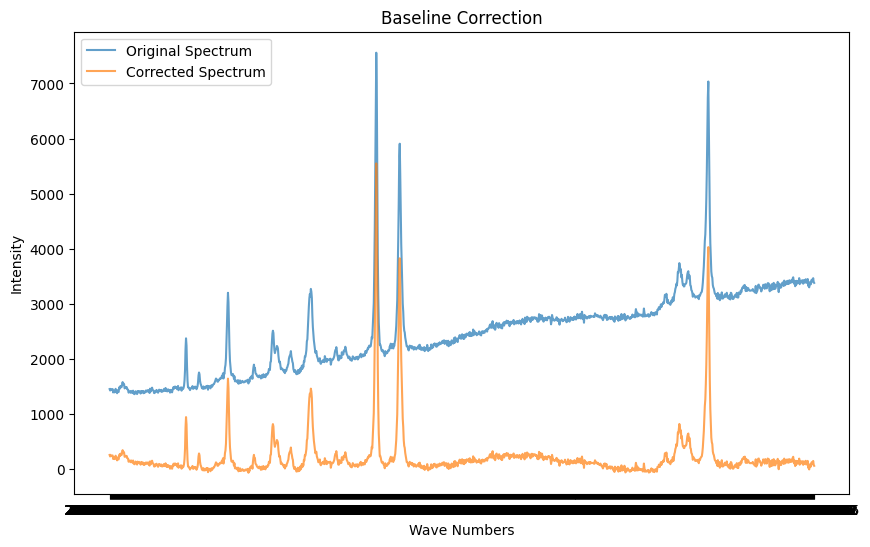

In [ ]:
import numpy as np
import pandas as pd
import peakutils
import matplotlib.pyplot as plt

# Load the spectrum data; ensure your file path and format match
data = pd.read_csv('/content/augmented_weathered_full_5plastics.csv')

# Assume the first column is the wave numbers and the remaining columns are intensity values
wave_numbers = data.columns[2:]
spectra = data.iloc[:, 2:1414]


# Create an empty DataFrame to store the baseline-corrected data
corrected_spectra = []

# Process each spectrum column
for col in range (len(spectra)):
    y = spectra.iloc[col].values.astype(float)
    # Estimate the baseline using PeakUtils. Adjust the degree parameter as needed.
    baseline = peakutils.baseline(y, deg=2)
    # Subtract the estimated baseline from the original spectrum data
    corrected = y - baseline
    corrected_spectra.append(corrected)

# Insert the wave numbers back as the first column in the corrected DataFrame
corrected_df = pd.DataFrame(corrected_spectra, columns=spectra.columns)


# Save the baseline-corrected data to a new CSV file
#corrected_df.to_csv('Corrected_synthetic_data_grouped_with_filenames.csv', index=False)

# Optional: Plot the original and corrected spectrum of the first intensity column for verification


plt.figure(figsize=(10, 6))
plt.plot(wave_numbers[:1412],spectra.iloc[205].values.astype(float), label='Original Spectrum', alpha=0.7)
plt.plot(wave_numbers[:1412], corrected_spectra[205], label='Corrected Spectrum', alpha=0.7)
plt.xlabel('Wave Numbers')
plt.ylabel('Intensity')
plt.title('Baseline Correction')
plt.legend()
plt.show()



final_df = pd.concat([data[['filename', 'plastic']],corrected_df], axis=1)


final_df.to_csv('aug_weathered_5plastics_baselineCorr', index=False)

In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('/content/aug_weathered_5plastics_baselineCorr.csv')  # Replace 'file.csv' with your actual file path

In [ ]:
df

,filename,plastic,200.4755491,203.3592491,206.2419365,209.1236123,212.0042772,214.8839322,217.7625781,220.6402157,...,3478.749316,3480.652831,3482.555849,3484.458372,3486.3604,3488.261932,3490.16297,3492.063513,3493.963561,3495.863115
0,wea-100.txt,PET,34.805892,37.046772,35.535303,46.521485,39.755317,59.986800,47.465935,46.692720,...,-31.351409,13.595936,-5.459068,-38.266421,-38.076123,-16.388174,-83.202575,-81.769324,-68.838423,-19.909871
1,wea-100.txt,PET,29.999536,42.213728,35.249841,51.735067,35.016284,55.064513,42.608214,41.840817,...,-27.996122,9.801231,-9.373153,-41.172865,-25.466052,-23.123276,-90.706927,-86.423906,-61.914312,-9.869929
2,wea-100.txt,PET,39.329251,39.031658,31.673667,45.005801,37.042937,54.606790,42.861014,44.276963,...,-17.436543,-1.728467,4.133912,-43.579183,-24.150868,-28.465674,-73.843070,-68.029464,-64.466839,-24.398344
3,wea-100.txt,PET,39.420711,41.675967,39.194583,41.131913,36.278642,55.411802,44.339141,41.324296,...,-16.819405,2.358965,9.225311,-38.736534,-29.546008,-8.286694,-77.135276,-77.191407,-73.175284,-19.427360
4,wea-100.txt,PET,40.123708,42.377817,31.372748,47.216699,35.103545,65.440754,48.422044,44.204533,...,-24.556585,2.876364,-8.102570,-42.578375,-25.225534,-22.134593,-69.120372,-72.077336,-79.238890,-30.568327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,wea-95.txt,PE,1344.879053,1331.705277,1333.034862,1353.367809,1336.704117,1315.793787,1315.636819,1325.983211,...,647.110917,617.650011,630.692468,638.988286,590.787465,599.840006,583.145908,585.205172,641.767798,638.333785
331,wea-96.txt,PE,156.485810,164.038470,139.341286,164.394260,160.197392,158.500680,140.304126,152.107728,...,-47.770967,-12.747872,20.525379,-11.951212,-23.927646,-9.903923,-63.880042,-19.856004,-33.081809,-3.807457
332,wea-97.txt,PE,671.667105,673.378725,677.841527,661.805510,666.270675,658.487021,658.454549,661.423259,...,236.547502,245.415709,233.035098,216.905668,226.277420,221.400353,200.024468,213.149764,250.276242,244.153902
333,wea-98.txt,PE,1399.324984,1393.743418,1399.414258,1395.337502,1393.013150,1385.441204,1386.871662,1372.804525,...,846.949900,822.989826,872.782157,833.326892,811.874032,810.423577,774.725527,830.779882,871.336641,802.895805


In [ ]:
df.drop(columns=['filename'], inplace=True)

In [ ]:
df

,plastic,200.4755491,203.3592491,206.2419365,209.1236123,212.0042772,214.8839322,217.7625781,220.6402157,223.516846,...,3478.749316,3480.652831,3482.555849,3484.458372,3486.3604,3488.261932,3490.16297,3492.063513,3493.963561,3495.863115
0,PET,34.805892,37.046772,35.535303,46.521485,39.755317,59.986800,47.465935,46.692720,53.417155,...,-31.351409,13.595936,-5.459068,-38.266421,-38.076123,-16.388174,-83.202575,-81.769324,-68.838423,-19.909871
1,PET,29.999536,42.213728,35.249841,51.735067,35.016284,55.064513,42.608214,41.840817,56.638773,...,-27.996122,9.801231,-9.373153,-41.172865,-25.466052,-23.123276,-90.706927,-86.423906,-61.914312,-9.869929
2,PET,39.329251,39.031658,31.673667,45.005801,37.042937,54.606790,42.861014,44.276963,50.278101,...,-17.436543,-1.728467,4.133912,-43.579183,-24.150868,-28.465674,-73.843070,-68.029464,-64.466839,-24.398344
3,PET,39.420711,41.675967,39.194583,41.131913,36.278642,55.411802,44.339141,41.324296,55.242926,...,-16.819405,2.358965,9.225311,-38.736534,-29.546008,-8.286694,-77.135276,-77.191407,-73.175284,-19.427360
4,PET,40.123708,42.377817,31.372748,47.216699,35.103545,65.440754,48.422044,44.204533,49.420870,...,-24.556585,2.876364,-8.102570,-42.578375,-25.225534,-22.134593,-69.120372,-72.077336,-79.238890,-30.568327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,PE,1344.879053,1331.705277,1333.034862,1353.367809,1336.704117,1315.793787,1315.636819,1325.983211,1307.832966,...,647.110917,617.650011,630.692468,638.988286,590.787465,599.840006,583.145908,585.205172,641.767798,638.333785
331,PE,156.485810,164.038470,139.341286,164.394260,160.197392,158.500680,140.304126,152.107728,147.411489,...,-47.770967,-12.747872,20.525379,-11.951212,-23.927646,-9.903923,-63.880042,-19.856004,-33.081809,-3.807457
332,PE,671.667105,673.378725,677.841527,661.805510,666.270675,658.487021,658.454549,661.423259,659.643150,...,236.547502,245.415709,233.035098,216.905668,226.277420,221.400353,200.024468,213.149764,250.276242,244.153902
333,PE,1399.324984,1393.743418,1399.414258,1395.337502,1393.013150,1385.441204,1386.871662,1372.804525,1369.239793,...,846.949900,822.989826,872.782157,833.326892,811.874032,810.423577,774.725527,830.779882,871.336641,802.895805


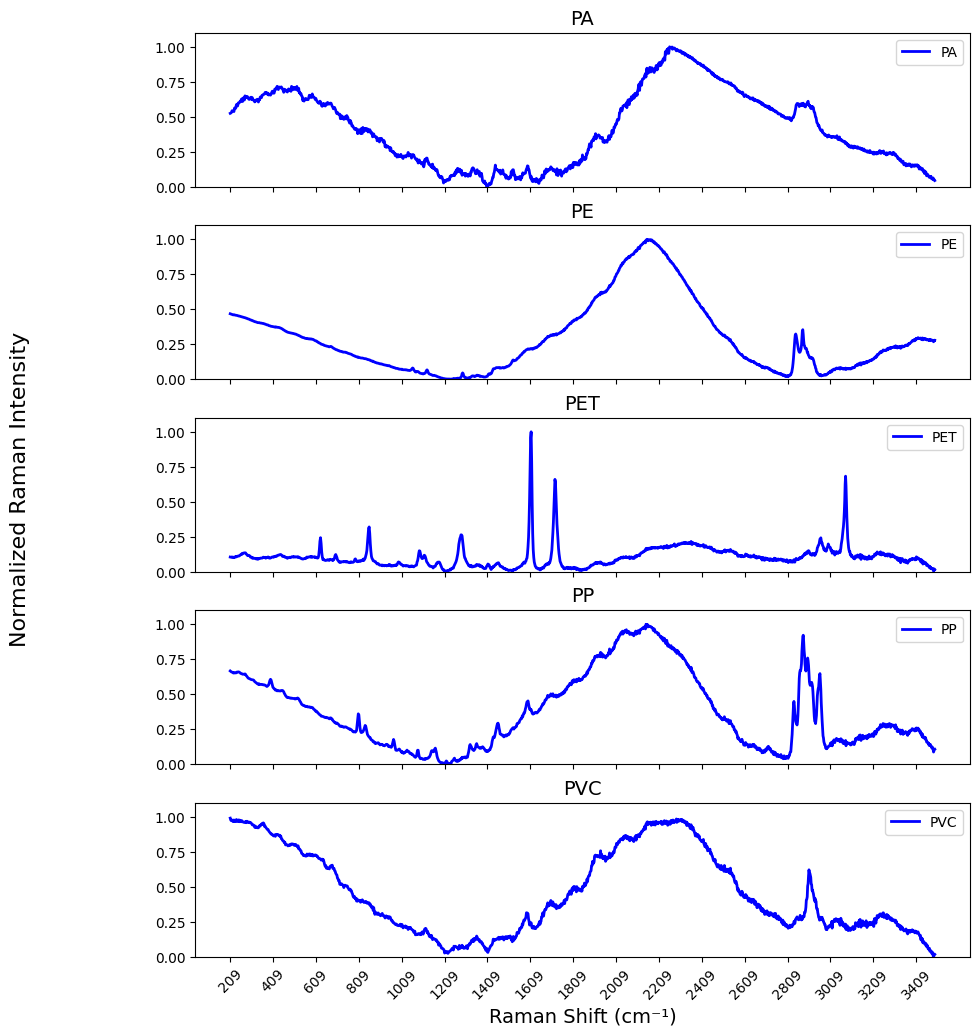

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Group by plastic type and compute the mean Raman intensity for each wavenumber
df_grouped = df.groupby('plastic').mean()

# Transpose the data so wavenumbers are on the x-axis
df_grouped = df_grouped.T
wavenumbers = df_grouped.index.astype(float)  # Convert index to float for proper plotting
plastics = df_grouped.columns

# Drop NaN values (if any)
df_grouped = df_grouped.dropna()

# Apply Min-Max Scaling AFTER computing the mean
scaler = MinMaxScaler()
df_grouped.loc[:, :] = scaler.fit_transform(df_grouped)

# Remove potential artifact at the first few wavenumbers
threshold = 3  # Ignore the first few wavenumbers if they cause artifacts
wavenumbers = wavenumbers[threshold:]
df_grouped = df_grouped.iloc[threshold:, :]

# Increase figure size for wider and taller subplots
fig, axes = plt.subplots(len(plastics), 1, figsize=(10, 12), sharex=True)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.25)

# Plot each plastic in its own subplot
for ax, plastic in zip(axes, plastics):
    ax.plot(wavenumbers, df_grouped[plastic], label=plastic, color='b', linewidth=2)
    ax.set_title(plastic, fontsize=14)
    ax.set_ylim(0, 1.1)  # Keep Y-axis between 0 and 1.1
    ax.legend()

    # Add wavenumber tick marks for every 200 cm⁻¹ interval
    ax.set_xticks(np.arange(min(wavenumbers), max(wavenumbers), step=200))
    ax.tick_params(axis='x', rotation=45)  # Rotate labels for clarity

# Set a single Y label for the whole figure with more space
fig.text(-0.06, 0.5, "Normalized Raman Intensity", va='center', rotation='vertical', fontsize=16)

# Set common X label
plt.xlabel("Raman Shift (cm⁻¹)", fontsize=14)

# Show plot
plt.show()


# Comparing the signal with original unaugmented dataset

In [ ]:
df1 = pd.read_csv("/content/weathered_full.csv")

# Define the plastics to keep
valid_plastics = {"PP", "PET", "PA", "PE", "PVC"}

# Filter rows where 'plastic' is in the valid set
data = df1[df1["plastic"].isin(valid_plastics)]

In [ ]:
data

,plastic,filename,200.4755491,203.3592491,206.2419365,209.1236123,212.0042772,214.8839322,217.7625781,220.6402157,...,3480.652831,3482.555849,3484.458372,3486.3604,3488.261932,3490.16297,3492.063513,3493.963561,3495.863115,3497.762175
0,PET,wea-100.txt,996.25,998.25,996.50,1007.25,1000.25,1020.25,1007.50,1006.50,...,2947.50,2931.50,2901.75,2905.00,2929.75,2866.00,2870.50,2886.50,2938.50,2913.25
1,PE,wea-101.txt,694.75,699.75,701.25,692.25,698.00,699.50,700.00,701.00,...,1843.00,1832.50,1843.00,1843.00,1857.50,1839.00,1833.50,1861.75,1881.75,1826.00
2,PET,wea-102.txt,947.50,945.75,937.00,947.25,940.75,942.25,963.00,954.25,...,3904.25,3899.00,3930.75,3883.00,3926.75,3848.75,3867.75,3898.50,3926.25,3869.75
3,PE,wea-103.txt,641.50,639.25,637.75,641.75,637.25,638.00,639.50,639.50,...,1011.00,996.25,1000.50,997.75,999.50,1001.75,1018.00,999.25,1004.25,1012.25
4,PE,wea-104.txt,624.25,628.50,625.50,632.75,626.50,629.00,623.25,620.25,...,3206.25,3151.75,3217.75,3200.25,3178.00,3169.00,3188.25,3218.75,3228.50,3161.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,PE,wea-95.txt,1154.00,1146.25,1153.00,1178.75,1167.50,1152.00,1157.25,1173.00,...,4730.25,4744.00,4753.00,4705.50,4715.25,4699.25,4702.00,4759.25,4756.50,4734.00
151,PE,wea-96.txt,1245.75,1254.75,1231.50,1258.00,1255.25,1255.00,1238.25,1251.50,...,2952.50,2987.00,2955.75,2945.00,2960.25,2907.50,2952.75,2940.75,2971.25,2915.25
152,PE,wea-97.txt,802.00,806.25,813.25,799.75,806.75,801.50,804.00,809.50,...,2775.00,2763.50,2748.25,2758.50,2754.50,2734.00,2748.00,2786.00,2780.75,2742.25
153,PE,wea-98.txt,1018.75,1018.25,1029.00,1030.00,1032.75,1030.25,1036.75,1027.75,...,5206.75,5258.25,5220.50,5200.75,5201.00,5167.00,5224.75,5267.00,5200.25,5203.25


In [ ]:
data['plastic'].value_counts()

,count
plastic,
PE,72
PP,51
PET,10
PVC,7
PA,4


In [ ]:
!pip install peakutils

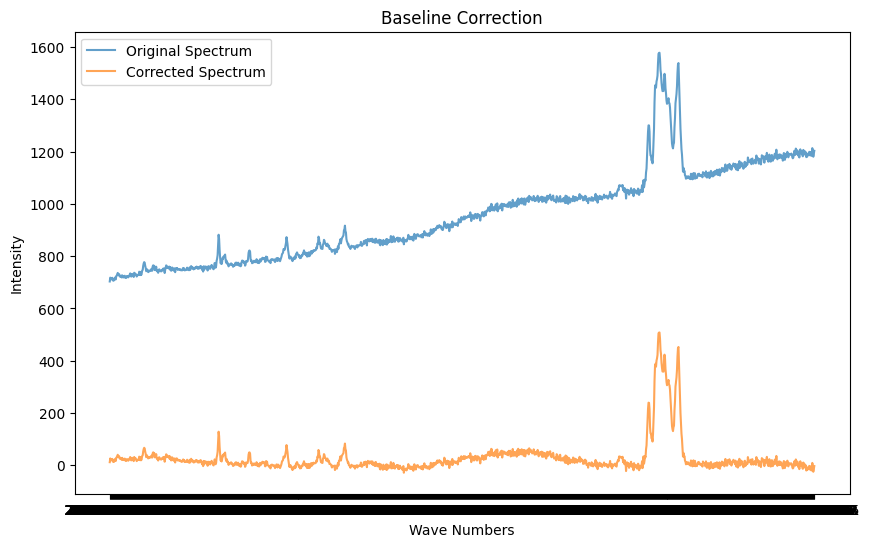

In [ ]:
import numpy as np
import peakutils

# Load the spectrum data; ensure your file path and format match
# data = pd.read_csv('/content/augmented_weathered_full_5plastics.csv')

# Assume the first column is the wave numbers and the remaining columns are intensity values
wave_numbers = data.columns[2:]
spectra = data.iloc[:, 2:1414]


# Create an empty DataFrame to store the baseline-corrected data
# corrected_spectra = []

# # Process each spectrum column
# for col in range (len(spectra)):
#     y = spectra.iloc[col].values.astype(float)
#     # Estimate the baseline using PeakUtils. Adjust the degree parameter as needed.
#     baseline = peakutils.baseline(y, deg=2)
#     # Subtract the estimated baseline from the original spectrum data
#     corrected = y - baseline
#     corrected_spectra.append(corrected)

# # Insert the wave numbers back as the first column in the corrected DataFrame
# corrected_df = pd.DataFrame(corrected_spectra, columns=spectra.columns)


# # Save the baseline-corrected data to a new CSV file
# #corrected_df.to_csv('Corrected_synthetic_data_grouped_with_filenames.csv', index=False)

# # Optional: Plot the original and corrected spectrum of the first intensity column for verification


# plt.figure(figsize=(10, 6))
# plt.plot(wave_numbers[:1412],spectra.iloc[-1].values.astype(float), label='Original Spectrum', alpha=0.7)
# plt.plot(wave_numbers[:1412], corrected_spectra[-1], label='Corrected Spectrum', alpha=0.7)
# plt.xlabel('Wave Numbers')
# plt.ylabel('Intensity')
# plt.title('Baseline Correction')
# plt.legend()
# plt.show()



# final_df = pd.concat([data[['filename', 'plastic']],corrected_df], axis=1)


# final_df.to_csv('temp.csv', index=False)

corrected_spectra = []

# Iterate over spectra rows correctly
for i in range(len(spectra)):
    y = spectra.iloc[i].values.astype(float)
    baseline = peakutils.baseline(y, deg=2)
    corrected = y - baseline
    corrected_spectra.append(corrected)

# Ensure corrected_spectra aligns properly
corrected_df = pd.DataFrame(corrected_spectra, columns=spectra.columns, index=spectra.index)

# Reset index before merging to ensure alignment
data = data.reset_index(drop=True)
corrected_df = corrected_df.reset_index(drop=True)

plt.figure(figsize=(10, 6))
plt.plot(wave_numbers[:1412],spectra.iloc[-1].values.astype(float), label='Original Spectrum', alpha=0.7)
plt.plot(wave_numbers[:1412], corrected_spectra[-1], label='Corrected Spectrum', alpha=0.7)
plt.xlabel('Wave Numbers')
plt.ylabel('Intensity')
plt.title('Baseline Correction')
plt.legend()
plt.show()
# Concatenate correctly
final_df = pd.concat([data[['filename', 'plastic']], corrected_df], axis=1)

# Save the corrected file
final_df.to_csv('temp.csv', index=False)


In [ ]:
og = pd.read_csv('/content/ogData_BaselineCorr_forPlotting_notUseful.csv')

In [ ]:
og

,filename,plastic,200.4755491,203.3592491,206.2419365,209.1236123,212.0042772,214.8839322,217.7625781,220.6402157,...,3478.749316,3480.652831,3482.555849,3484.458372,3486.3604,3488.261932,3490.16297,3492.063513,3493.963561,3495.863115
0,wea-100.txt,PET,34.805892,37.046772,35.535303,46.521485,39.755317,59.986800,47.465935,46.692720,...,-31.351409,13.595936,-5.459068,-38.266421,-38.076123,-16.388174,-83.202575,-81.769324,-68.838423,-19.909871
1,wea-101.txt,PE,318.804504,322.521840,322.739974,312.458906,316.928636,317.149163,316.370488,316.092612,...,467.817562,452.153468,441.490171,451.827672,451.665971,466.005068,447.344962,441.685655,469.777145,489.619433
2,wea-102.txt,PET,103.119150,101.826621,93.530254,104.230048,98.176005,100.118123,121.306403,112.990845,...,-53.650982,-73.074517,-83.251889,-56.433100,-109.118148,-70.307035,-153.249760,-139.196323,-113.396724,-90.600963
3,wea-103.txt,PE,160.018008,157.069635,154.871780,158.174442,152.977621,153.031318,153.835531,153.140263,...,48.217245,58.494166,43.771603,48.049558,45.328031,47.107020,49.386527,65.666552,46.947093,51.978152
4,wea-104.txt,PE,1208.057017,1208.130645,1200.957099,1204.036380,1193.618487,1191.953420,1182.041180,1174.881767,...,700.407356,710.443688,655.732846,721.524831,703.819642,681.367280,672.167744,691.221035,721.527152,731.086095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,wea-95.txt,PE,1344.879053,1331.705277,1333.034862,1353.367809,1336.704117,1315.793787,1315.636819,1325.983211,...,647.110917,617.650011,630.692468,638.988286,590.787465,599.840006,583.145908,585.205172,641.767798,638.333785
140,wea-96.txt,PE,156.485810,164.038470,139.341286,164.394260,160.197392,158.500680,140.304126,152.107728,...,-47.770967,-12.747872,20.525379,-11.951212,-23.927646,-9.903923,-63.880042,-19.856004,-33.081809,-3.807457
141,wea-97.txt,PE,671.667105,673.378725,677.841527,661.805510,666.270675,658.487021,658.454549,661.423259,...,236.547502,245.415709,233.035098,216.905668,226.277420,221.400353,200.024468,213.149764,250.276242,244.153902
142,wea-98.txt,PE,1399.324984,1393.743418,1399.414258,1395.337502,1393.013150,1385.441204,1386.871662,1372.804525,...,846.949900,822.989826,872.782157,833.326892,811.874032,810.423577,774.725527,830.779882,871.336641,802.895805


In [ ]:
og.drop(columns=['filename'], inplace=True)

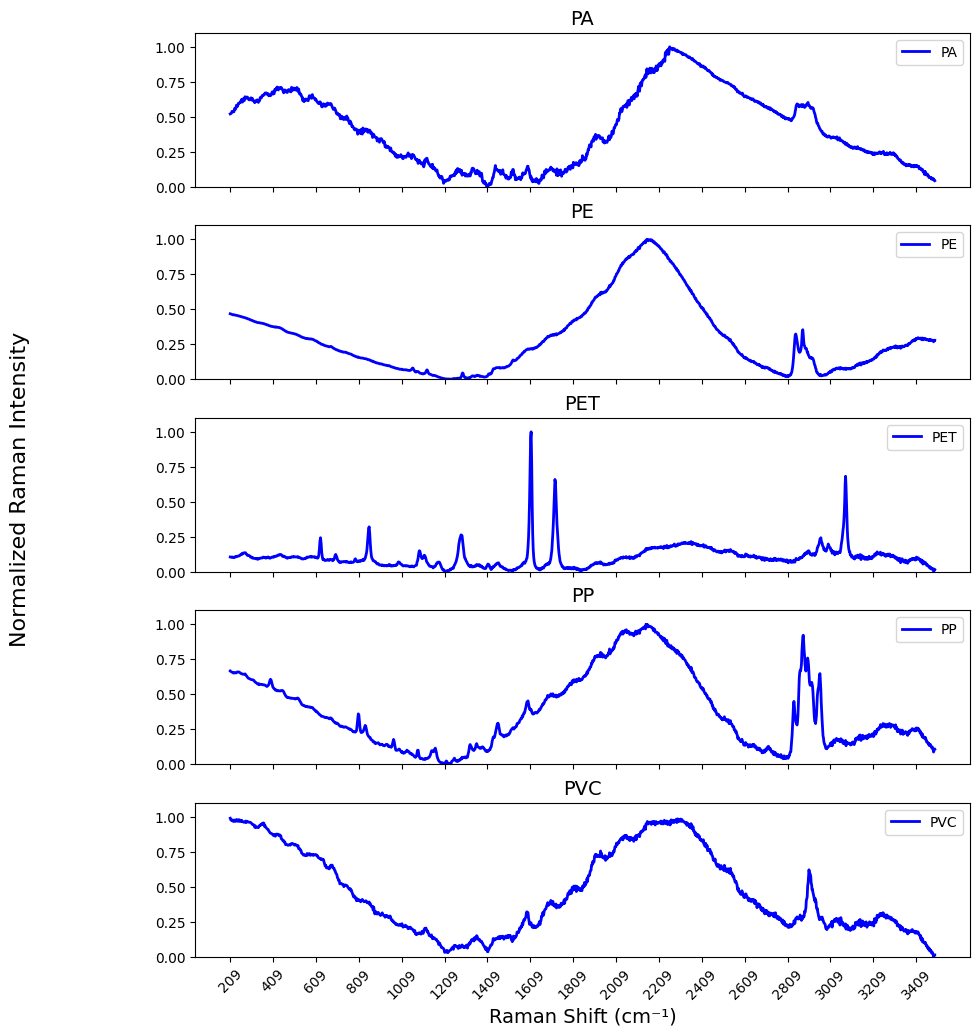

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Group by plastic type and compute the mean Raman intensity for each wavenumber
df_grouped = og.groupby('plastic').mean()

# Transpose the data so wavenumbers are on the x-axis
df_grouped = df_grouped.T
wavenumbers = df_grouped.index.astype(float)  # Convert index to float for proper plotting
plastics = df_grouped.columns

# Drop NaN values (if any)
df_grouped = df_grouped.dropna()

# Apply Min-Max Scaling AFTER computing the mean
scaler = MinMaxScaler()
df_grouped.loc[:, :] = scaler.fit_transform(df_grouped)

# Remove potential artifact at the first few wavenumbers
threshold = 3  # Ignore the first few wavenumbers if they cause artifacts
wavenumbers = wavenumbers[threshold:]
df_grouped = df_grouped.iloc[threshold:, :]

# Increase figure size for wider and taller subplots
fig, axes = plt.subplots(len(plastics), 1, figsize=(10, 12), sharex=True)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.25)

# Plot each plastic in its own subplot
for ax, plastic in zip(axes, plastics):
    ax.plot(wavenumbers, df_grouped[plastic], label=plastic, color='b', linewidth=2)
    ax.set_title(plastic, fontsize=14)
    ax.set_ylim(0, 1.1)  # Keep Y-axis between 0 and 1.1
    ax.legend()

    # Add wavenumber tick marks for every 200 cm⁻¹ interval
    ax.set_xticks(np.arange(min(wavenumbers), max(wavenumbers), step=200))
    ax.tick_params(axis='x', rotation=45)  # Rotate labels for clarity

# Set a single Y label for the whole figure with more space
fig.text(-0.06, 0.5, "Normalized Raman Intensity", va='center', rotation='vertical', fontsize=16)

# Set common X label
plt.xlabel("Raman Shift (cm⁻¹)", fontsize=14)

# Show plot
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Load the CSV file
file_path = "/content/Multiclass_wethered_newClasses_nonAugmented.csv"
df = pd.read_csv(file_path)
plastics = ['PVC', 'PET', 'PS', 'PE', 'PC']
df = df[df['Plastic'].isin(plastics)]

In [ ]:
df

,Filename,Plastic,200.0904693,202.9747514,205.8580216,208.7402807,211.6215296,214.501769,217.3809999,220.259223,...,3478.533384,3480.437351,3482.340824,3484.243803,3486.146288,3488.048279,3489.949777,3491.850782,3493.751294,3495.651313
0,wea-51.txt,PC,45.544517,37.933507,29.823678,25.215030,35.357563,23.751277,21.646171,11.042246,...,75.779993,84.574403,54.619992,64.166763,72.714715,90.263847,94.564160,69.615653,64.168328,35.722183
1,wea-48.txt,PS,3934.106857,3934.300666,3914.504031,3899.716951,3905.939427,3854.171459,3835.413046,3834.664190,...,2412.506400,2471.097325,2528.697805,2322.307841,2625.927433,2517.556580,2271.195283,2538.843542,2231.501356,2261.168727
2,wea-30.txt,PE,2585.931676,2556.950522,2605.975871,2624.007725,2704.046082,2641.090942,2747.142306,2770.200174,...,3255.612709,3201.749698,3279.893190,3214.043186,3170.199686,3339.362689,3103.532197,3276.708207,3184.890722,3204.079740
3,wea-161.txt,PET,576.664307,626.214767,621.263139,641.059424,621.103622,616.145732,663.185754,662.223688,...,-6.819494,-98.445842,-101.074277,-76.204800,-119.087411,-111.472109,-188.608894,-208.747768,-104.888729,-126.281777
4,wea-49.txt,PVC,4790.722646,4769.328431,4743.191537,4750.311963,4631.939711,4647.824779,4598.467168,4565.616878,...,75.791644,-111.588819,-13.961961,-4.827782,-53.186283,2.712538,-66.881321,-46.467859,-89.047077,-132.118973


In [ ]:
df['Plastic'].value_counts()

,count
Plastic,
PC,1
PS,1
PE,1
PET,1
PVC,1


In [ ]:
# Columns to exclude from augmentation (categorical columns)
exclude_cols = ["Plastic", "Filename"]

# Identify numeric columns excluding the categorical ones
numeric_cols = df.select_dtypes(include=[np.number]).columns.difference(exclude_cols)

# Define number of augmentations per "plastic" type
plastic_augmentation_map = {
    "PC": 39,
    "PS": 39,
    "PET": 39,
    "PVC": 39,
    "PE": 39
}

# Function to generate augmented rows while keeping values close to the original row
def augment_row(row, num_augmentations, noise_factor=0.005):
    augmented_rows = []

    for _ in range(num_augmentations):
        new_row = row.copy()

        # Generate small noise with respect to the original row
        noise = np.random.normal(loc=0, scale=noise_factor * np.abs(row[numeric_cols]), size=row[numeric_cols].shape)
        new_row[numeric_cols] = row[numeric_cols] + noise

        # Ensure variations remain within a tight range of the original row
        new_row[numeric_cols] = np.clip(new_row[numeric_cols], row[numeric_cols] * 0.995, row[numeric_cols] * 1.005)

        # Ensure categorical columns are copied exactly
        new_row[exclude_cols] = row[exclude_cols]

        augmented_rows.append(new_row)

    return augmented_rows

# Apply augmentation
augmented_data = []
for i in range(len(df)):
    original_row = df.iloc[i]
    augmented_data.append(original_row)

    plastic_type = original_row["Plastic"]
    num_augmentations = plastic_augmentation_map.get(plastic_type, 0)

    augmented_data.extend(augment_row(original_row, num_augmentations))

# Create new DataFrame
augmented_df = pd.DataFrame(augmented_data, columns=df.columns)

# Save the augmented dataset
augmented_file_path = "/content/Multiclass_wethered_newClasses_Augmented.csv"
augmented_df.to_csv(augmented_file_path, index=False)

print(f"Augmented dataset saved to: {augmented_file_path}")


/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return bound(*args, **kwds)
/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return bound(*args, **kwds)
/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavi

Augmented dataset saved to: /content/Multiclass_wethered_newClasses_Augmented.csv


In [ ]:
f = "/content/Multiclass_wethered_newClasses_Augmented.csv"
modified_df = pd.read_csv(f)
modified_df

,Filename,Plastic,200.0904693,202.9747514,205.8580216,208.7402807,211.6215296,214.501769,217.3809999,220.259223,...,3478.533384,3480.437351,3482.340824,3484.243803,3486.146288,3488.048279,3489.949777,3491.850782,3493.751294,3495.651313
0,wea-51.txt,PC,45.544517,37.933507,29.823678,25.215030,35.357563,23.751277,21.646171,11.042246,...,75.779993,84.574403,54.619992,64.166763,72.714715,90.263847,94.564160,69.615653,64.168328,35.722183
1,wea-51.txt,PC,45.698301,37.743840,29.713226,25.146305,35.258338,23.773053,21.754402,10.987035,...,75.876860,84.404647,54.849350,63.845929,72.967797,90.075607,94.421185,69.751708,64.489170,35.543572
2,wea-51.txt,PC,45.532073,38.027272,29.970200,25.105695,35.534351,23.680575,21.537940,11.038036,...,75.655645,84.426412,54.738879,64.092005,72.598718,89.881300,94.633812,69.960937,63.847486,35.757634
3,wea-51.txt,PC,45.404727,37.855474,29.955027,25.341106,35.258852,23.724601,21.692209,11.088322,...,75.794578,84.997275,54.893092,64.236859,72.351141,89.957510,94.091339,69.834369,63.930081,35.828034
4,wea-51.txt,PC,45.316794,37.934895,29.808334,25.088955,35.439267,23.870033,21.553761,10.987035,...,75.446886,84.997275,54.346893,64.487597,72.450252,90.039909,94.944894,69.267575,64.301399,35.900794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,wea-49.txt,PVC,4798.643359,4746.985640,4744.206653,4729.048250,4630.404634,4671.063903,4575.474832,4566.905928,...,75.412685,-112.146763,-14.031771,-4.851921,-53.452214,2.726100,-67.215728,-46.700199,-88.601841,-132.779568
196,wea-49.txt,PVC,4794.567983,4774.763381,4742.467846,4755.780855,4608.780012,4656.603511,4586.557975,4542.788794,...,76.170602,-111.030875,-14.031771,-4.851921,-53.452214,2.714862,-67.215728,-46.700199,-89.492312,-132.779568
197,wea-49.txt,PVC,4813.109186,4745.481789,4761.155672,4772.598901,4608.780012,4632.543437,4603.103281,4569.695910,...,75.614700,-112.146763,-14.031771,-4.803644,-53.452214,2.698975,-67.215728,-46.235520,-89.492312,-132.779568
198,wea-49.txt,PVC,4814.676259,4748.528882,4742.855629,4773.597872,4655.099410,4662.934166,4579.053897,4580.803298,...,75.868908,-112.146763,-14.031771,-4.851921,-53.452214,2.726100,-67.215728,-46.700199,-89.492312,-132.779568
